Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# install mat4py to convert matlab to python and Tsai
!pip install mat4py
!pip install -Uqq tsai

     |████████████████████████████████| 241 kB 5.3 MB/s 
     |████████████████████████████████| 197 kB 77.8 MB/s 
     |████████████████████████████████| 2.5 MB 63.2 MB/s 
     |████████████████████████████████| 59 kB 7.6 MB/s 


Either import tsai or keras (incompatible together)

In [1]:
# import tsai
from tsai.all import *

In [ ]:
# import keras method
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

In [1]:
import numpy as np
import h5py
from mat4py import loadmat
import pandas as pd

Load mat file into py dictionary

In [2]:
data = loadmat('/content/drive/MyDrive/filtered_LiveEditor_all_data_v3.mat')

In [16]:
data.keys()

dict_keys(['inputs', 'outputs'])

In [3]:
output=data["outputs"]
input = data["inputs"]

function to extract the data into 3d array for the input and 2d for the output

In [4]:
def extractor(data):
    y=np.dstack(data["outputs"].values())

    x_axis=np.dstack(data["inputs"]['x'].values())
    y_axis=np.dstack(data["inputs"]['y'].values())
    z_axis=pd.np.dstack(data["inputs"]['z'].values())
    all=np.concatenate((x_axis,y_axis,z_axis), -1)
    return(y,all)


In [5]:
Y,x=extractor(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and

################# Keras with baselline model


In [7]:
x2 = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x2), np.array(Y[:,:,4]), test_size=0.25, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16340, 101, 24, 1), (16340, 101), (5447, 101, 24, 1), (5447, 101))

In [23]:
model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=366))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = X_train[0].shape))

model.add(Conv2D(128, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=['mse', 'mae', 'mape'] # you can add several if needed
                 )

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 99, 22, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 10, 128)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 61440)             0         
                                                                 
 dense_16 (Dense)            (None, 512)               31457792  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                      

In [24]:
model.fit(X_train, y_train, batch_size=2048, epochs=50, verbose=1, validation_data=(X_test, y_test) )

Epoch 1/50
8/8 [==============================] - 8s 939ms/step - loss: 83.0972 - mse: 83.0972 - mae: 3.8345 - mape: 141459.8906 - val_loss: 0.1819 - val_mse: 0.1819 - val_mae: 0.3992 - val_mape: 19959.5977
Epoch 2/50
8/8 [==============================] - 7s 913ms/step - loss: 0.1292 - mse: 0.1292 - mae: 0.2718 - mape: 11182.6719 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.1357 - val_mape: 3367.0027
Epoch 3/50
8/8 [==============================] - 7s 922ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1577 - mape: 3675.6543 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0975 - val_mape: 1522.3755
Epoch 4/50
8/8 [==============================] - 7s 940ms/step - loss: 0.0162 - mse: 0.0162 - mae: 0.0944 - mape: 1527.6932 - val_loss: 0.0098 - val_mse: 0.0098 - val_mae: 0.0724 - val_mape: 1397.5817
Epoch 5/50
8/8 [==============================] - 7s 951ms/step - loss: 0.0110 - mse: 0.0110 - mae: 0.0782 - mape: 1692.5824 - val_loss: 0.0096 - val_mse: 0.0096 - val_mae: 0.0771 - val_

TSai models

In [6]:
X2 = np.moveaxis(np.array(x), -1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X2), np.array(Y[:,:,4]), test_size=0.25, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [154]:
X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])

In [155]:
tfms  = [None, [TSRegression()]]

dls = get_ts_dls(X, y, splits=splits, tfms=tfms, bs=128)

SuggestedLRs(valley=4.365158383734524e-05)

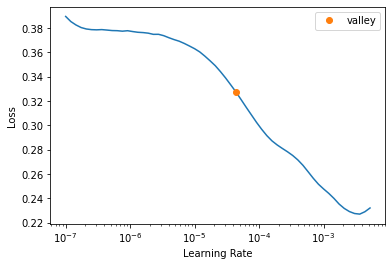

In [156]:
learn = ts_learner(dls, arch=TSTPlus  , metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.075246,0.038514,0.151453,0.196251,00:03
1,0.022423,0.013621,0.089430,0.116711,00:03
2,0.010107,0.007983,0.068295,0.089346,00:03
3,0.006400,0.005640,0.056981,0.075102,00:03
4,0.004781,0.004970,0.053501,0.070498,00:03
5,0.003899,0.003800,0.046048,0.061644,00:03
6,0.003298,0.003350,0.042764,0.057881,00:03
7,0.002936,0.003052,0.040347,0.055243,00:03
8,0.002703,0.002858,0.038755,0.053460,00:03
9,0.002593,0.002829,0.038476,0.053188,00:03


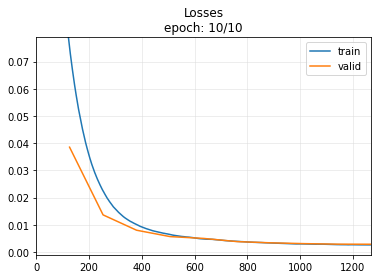

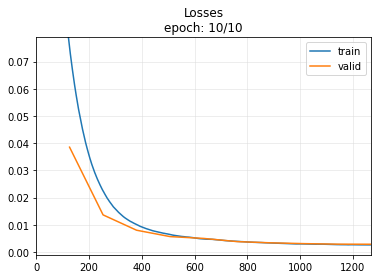

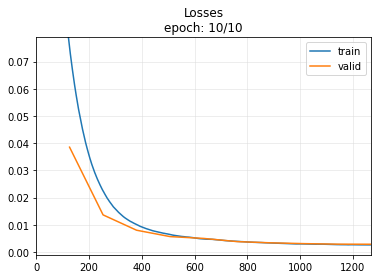

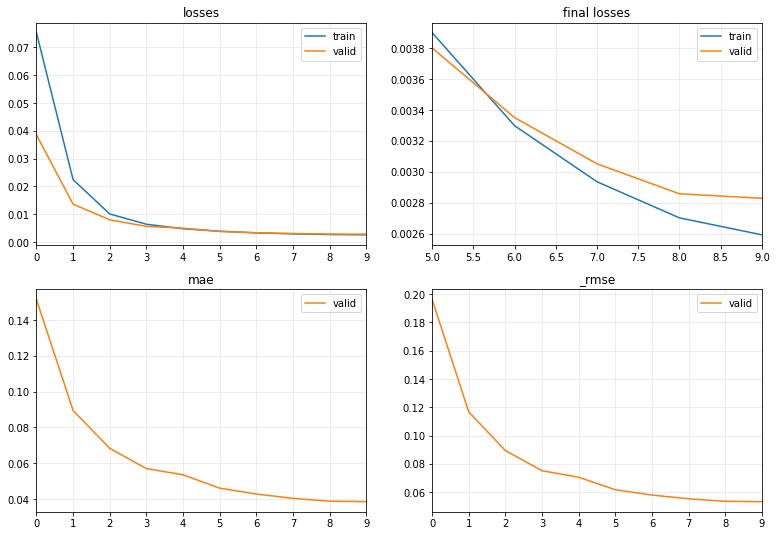

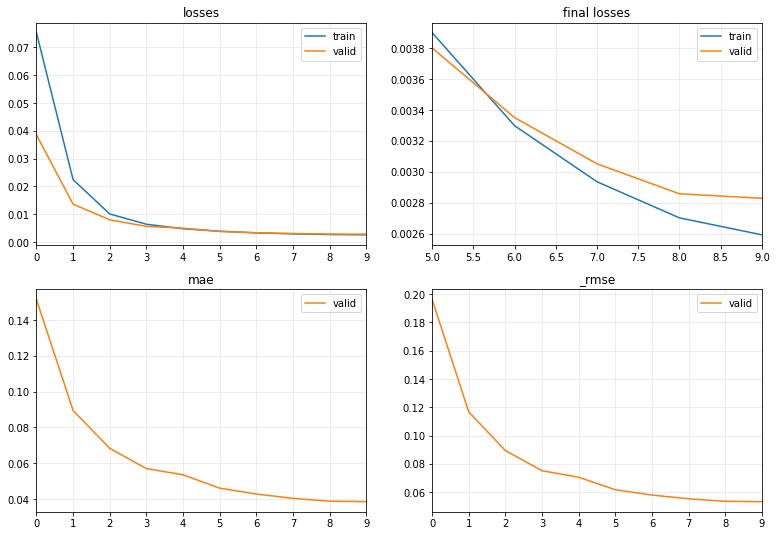

In [157]:
learn.fit_one_cycle(10, lr_max=slice(2e-5,3e-4), cbs=ShowGraph())

SuggestedLRs(valley=3.0199516913853586e-05)

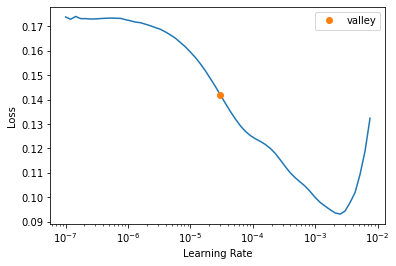

In [58]:
learn2 = ts_learner(dls, arch=XCM , metrics=[mae, rmse], cbs=ShowGraph())
learn2.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.023220,0.011086,0.081418,0.105291,00:03
1,0.006746,0.004607,0.049795,0.067878,00:03
2,0.003857,0.003335,0.041440,0.057747,00:03
3,0.002883,0.002684,0.037028,0.051803,00:03
4,0.002351,0.002178,0.032640,0.046669,00:03
5,0.001972,0.002022,0.031801,0.044972,00:03
6,0.001725,0.001739,0.028476,0.041707,00:03
7,0.001562,0.001612,0.027022,0.040152,00:03
8,0.001472,0.001568,0.026495,0.039601,00:03
9,0.001422,0.001554,0.026351,0.039424,00:03


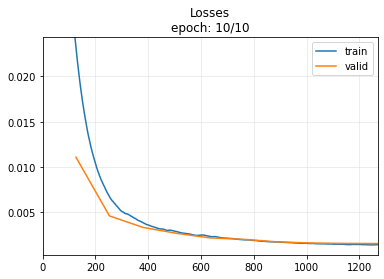

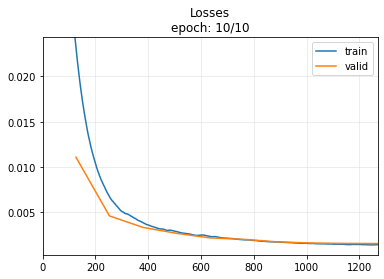

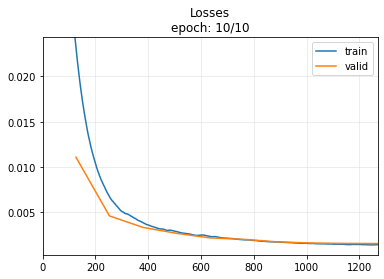

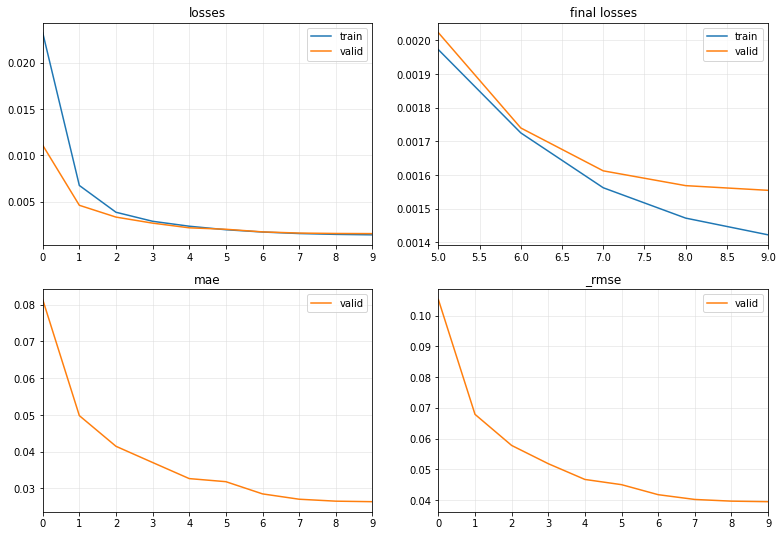

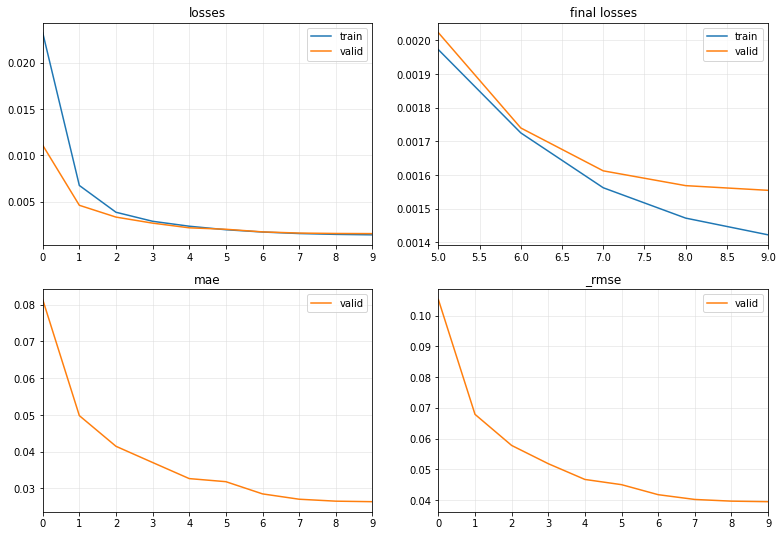

In [59]:
learn2.fit_one_cycle(10, lr_max=slice(1e-5,2e-4), cbs=ShowGraph())